#  Les lois usuelles avec scipy


In [1]:
%reset -f
import numpy as np
np.set_printoptions(precision=2,suppress=True)
import matplotlib.pyplot as plt
plt.style.use("default")

"""Voici un autre import qu'il faut connaître:
scipy= sci-entific py-thon """
import scipy.stats as stats

## Introduction

Voici 4 mots clefs à retenir qui permettent aussi d'améliorer son anglais scientifique:

* pdf -> Probability density function  -> densité (prend des réels en argument)
* pmf -> Probability mass function -> densité discrète (prend des entiers en argument)

* cdf -> Cumulative density function   -> fonction de répartition
* ppf -> Percent point function (inverse of cdf ) ->  fonction quantile (ou percentile)

* rvs -> Random variables -> simulation d'un échantillon de v.a ayant la loi donnée


À ce point, vous vous dites qu'il y a vraiment trop de choses à retenir. Mais nous allons les pratiquer très souvent : cela rentrera tout seul. Et pensez à la complétion automatique.

## Densité, fonction de réparition, quantiles...

### ...d'une loi continue

Avec `scipy.stats`, on simule des v.a ainsi:

    simus=stats.norm.rvs(loc=0, scale=1, size=1000)

C'est tout à fait identique à la manière de faire avec `numpy.random`:

    simus=np.random.normal(loc=0,scale=1,size=1000)

Cependant `scipy.stats` contient encore plus de lois que `numpy.random`. Par exemple la loi t de student utile pour les stats.


In [2]:
simus=stats.norm.rvs(loc=0, scale=1, size=1000)

x=np.linspace(-3,3,100)
pdf=stats.norm.pdf(x, loc=0, scale=1)
cdf=stats.norm.cdf(x, loc=0, scale=1)
ppf=stats.norm.ppf(x, loc=0, scale=1)

fig,axs=plt.subplots(1,2,figsize=(12,5))
axs[0].hist(simus,20,density=True,label="simus",edgecolor="k")
axs[0].plot(x,pdf,label="pdf")
axs[0].plot(x,cdf,label="cdf")
axs[0].legend()

axs[1].plot(x, cdf,label="cdf")
axs[1].plot(x, ppf,label="ppf")
axs[1].plot(x, x,label="y=x")
axs[1].legend();

### →♡♡♡

Modifiez ce programme pour utiliser la syntaxe 'moderne' de matplotlib.

In [3]:
fig,axs=plt.subplots(1,2,figsize=(12,5))

...


#### →♡

***A vous:*** Le tracé de la `ppf` ci-dessus n'est pas très joli, on a l'impression qu'il est incomplet.
Changez cela $(2\heartsuit)$.  *Aide:*  n'oubliez pas qu'une courbe, c'est des points qu'on relie entre eux, et que ces points, c'est vous qui les spécifiez.

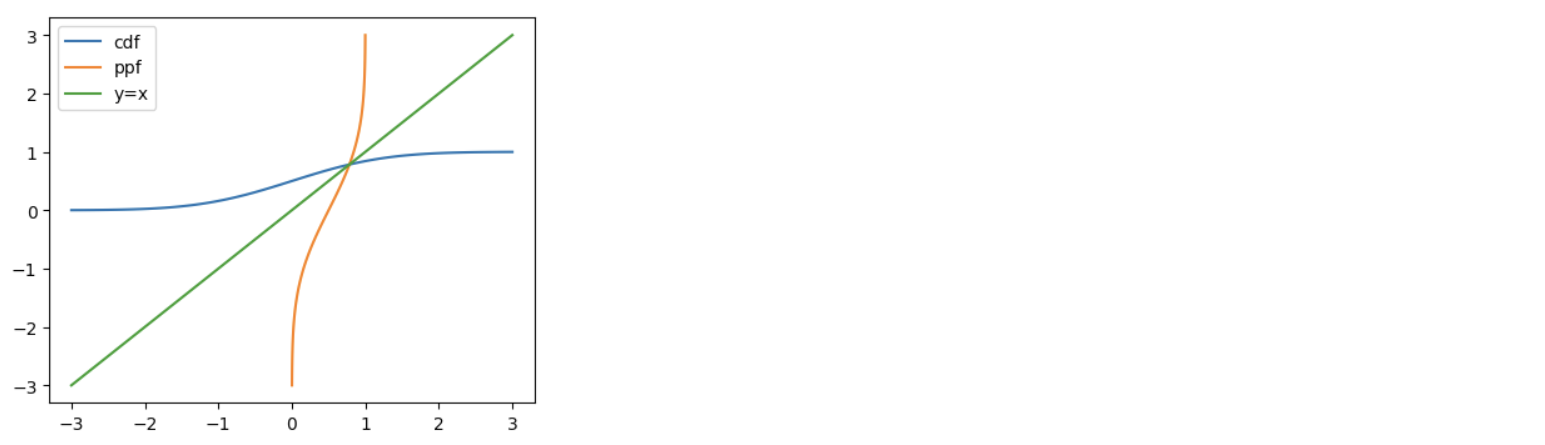

### ...d'une loi discrète

In [5]:
n=7
p=0.2
simus=stats.binom.rvs(n, p, size=1000)

x=np.arange(0,n+1)
bins=np.arange(0,n+2)-0.5
""" attention, la densité discrète en scipy c'est pmf et pas pdf """
pdf=stats.binom.pmf(x, n, p)
cdf=stats.binom.cdf(x, n, p)

plt.hist(simus, bins, density=True, label="simus",edgecolor="k")
plt.plot(x, pdf,'o' , label="pdf")
plt.plot(x, cdf,'+', label="cdf")
plt.title("loi binomiale")
plt.legend();

In [6]:
""" variante: On trace la fonction de répartition en escalier."""
fig, (ax0,ax1)=plt.subplots(1,2,sharey=True,figsize=(13,5))



for xc in x:
    ax0.axvline(x=xc, color='0.9')
    ax1.axvline(x=xc, color='0.9')

ax0.plot(x, cdf,drawstyle='steps-post')
ax0.plot(x, cdf,"o")


ax1.plot(x, cdf,drawstyle='steps-pre')
ax1.plot(x, cdf,"o");


#### → ♡♡

***A vous:***  Laquelle $(1\heartsuit)$ de ces deux représentations correspond à la fonction de répartition, à savoir:
	$x \to P[ X\leq x]$


***Correction:***
Lorsqu'on trace la fonction de répartition en escalier, il faut s'assurer qu'elle corresponde à la définition $F : x \mapsto P[ X\leq x]$. Par exemple, il faut que $F(0.5) = P[ X \leq 0.5] = P[X = 0] = F(0)$. Cela correspond au premier graphique ci-dessous, avec le paramètre `drawstyle='steps-post'`. Pour mieux visualiser, on a ajouté les points correspondant aux valeurs de `x` entières.

***Conseil python au passage:*** lisez bien les messages d'erreur. Par exemple si vous écrivez :

    plt.plot(x, y,drawstyle='steps-after')
    
cela provoque un message d'erreur :

    ValueError: Unrecognized drawstyle steps-after
    default steps-post steps-mid steps

Ce message nous indique que vous vous êtes trompé sur l'argument de `drawstyle` et il donne la liste les différents mots clefs valides.

D'après vous, quand on écrit `drawstyle='default'`, comment les points sont reliés $(1\heartsuit)$?

## Paramètres de localisation, d'échelle, de forme


### généralité

Toutes les lois continues dans scipy ont un paramètre de localisation `loc` que nous notons ici $\mu$ et un paramètre d'échelle `scale` que nous notons ici $\sigma$. Leur interprétation est la suivante :

Si l'appel de `stats.xxx.rvs()` renvoie une v.a $X$ alors `stats.xxx.rvs(loc=mu,scale=sigma)` renvoie une v.a ayant la même loi que  $\sigma X + \mu$.   Au niveau de la densité, cela introduit une translation et une dilatation :


***Proposition :*** si $x\to f(x)$ est la densité d'une va $X$, alors la densité de $\sigma X + \mu$ est:
$$
   \frac 1 \sigma  \ f \ \Big(  \frac{ x-\mu}  \sigma \Big)
$$
Hum ... je pense qu'il y a une petite erreur. Démontrons cette proposition pour vérifier.


#### →♡♡








*Démo de la proposition*, à compléter: Considérons $\phi$ fonction test et $X$ une v.a de densité $f$. On a
$$
      \mathbf  E[\phi( \sigma X + \mu )] =   \int \phi( \sigma x + \mu) \ f(x) \ dx.
$$
On effectue le changement de variable  $\sigma x + \mu \to y$:
$$
       \mathbf  E[\phi( \sigma X + \mu )] =   \int \phi( y) \ f(... ) \ dy ...  
$$
On en déduit que ...



#### →♡♡

*Astuce:* Pour ne pas s'encombrer la mémoire, retenez uniquement les densités des lois dans le cas $\mu=0$ et $\sigma=1$. Par exemple, complétez le tableau:  

$$
\begin{array}{|c|c|c|}
\hline
\text{ nom de la loi } & \text{ simplifié } & \text{complète} \\
\hline
\text{exponentielle} & e^{-x} 1_{\{x>0\}} &  \frac {1} {\sigma} \exp(-  \frac {x-\mu } {\sigma} )1_{\{x>\mu\}} \\
\hline
\text{normale} & \frac {1} { \sqrt {2 \pi}} e^{- \frac 12  x^2 }  & \dots \\
\hline
\text{Weibull} & k \, x^{k-1}e^{- x^k }1_{\{x>0\}}  & \dots \\
\hline
\end{array}
$$

#### →♡

***A vous:*** Pourquoi $(1\heartsuit)$ M. Weilbull a choisi cette densité plutôt qu'une autre ?




### La gaussienne,  0 paramètre de forme


C'est une loi portée par $\mathbb R$ dont la densité doit être gravée dans sa mémoire:
$$
\text{norm.pdf}(x)=   \frac{1}{\sqrt{2\pi}} e^{-\frac 1 2 x^2}
$$

In [7]:
plt.hist(stats.norm.rvs(loc=0,scale=1,size=400),density=True,edgecolor="k")

x=np.linspace(-4,4,100)
plt.plot(x,stats.norm.pdf(x,loc=0,scale=1));

***A vous:*** Connaissez-vous d'autres lois que la gaussienne qui n'ont pas de paramètre de forme $(1\heartsuit)$?

### La loi gamma, 1 paramètre de forme

C'est une loi portée par $\mathbb R_+$ dont la densité est:
$$
\text{gamma.pdf}(x,a) = \frac{x^{a-1} e^{-x}}{\Gamma (a)}
$$



#### →♡


***A vous:*** Pour quelle valeur de `a` retrouve-t-on une loi exponentielle?

 Pour $a=1$


In [8]:
a=2 #paramètre de forme
plt.hist(stats.gamma.rvs(a=a,size=400),density=True,edgecolor="k")

x=np.linspace(0,8,100)
plt.plot(x,stats.gamma.pdf(x,a=a));

#### → ♡♡♡

***A vous:*** Améliorez cet histogramme pour qu'il ressemble plus à la densité. Faites varier  les paramètres `loc` et `scale` et superposez les graphiques obtenus pour que l'on comprenne bien les effets de dilatation et de translation de ces paramètres.



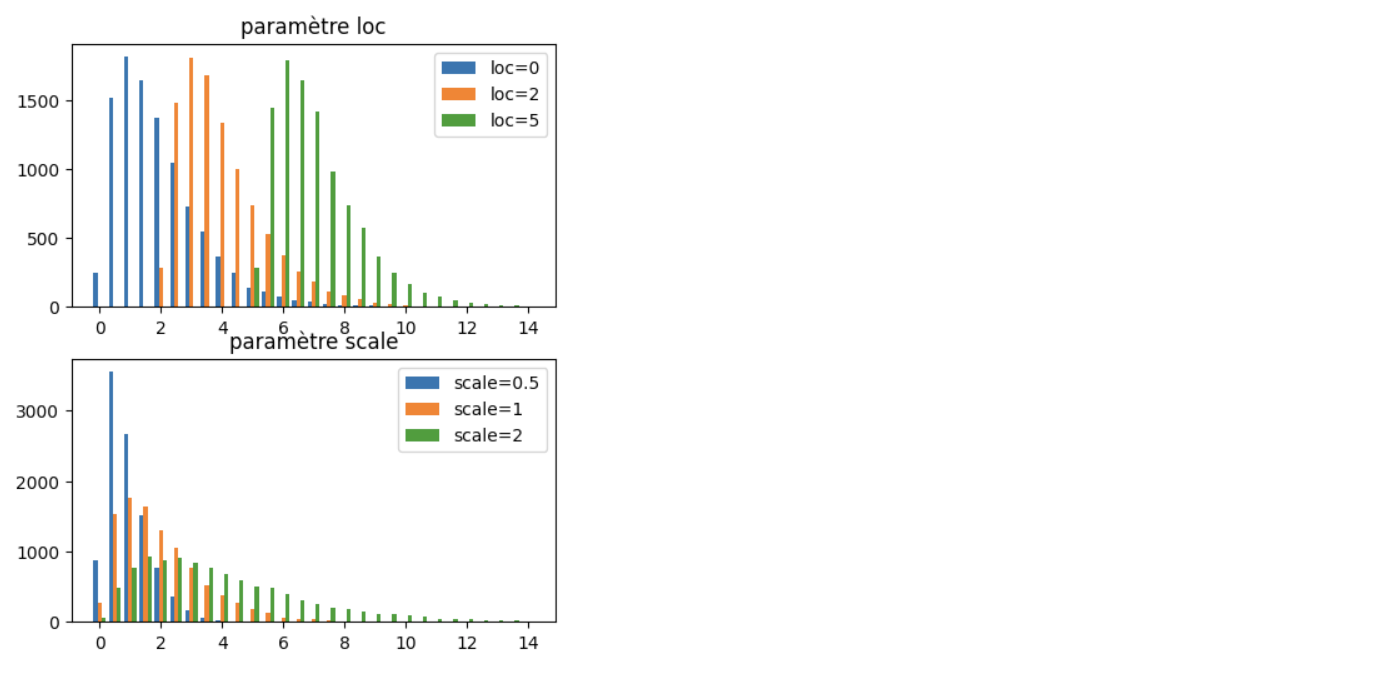

#### →♡



***A vous:*** Pour quels paramètres de forme la densité est monotone $(1\heartsuit)$?  



#### →♡♡

***A vous:*** Quand le  paramètre de forme  $a$ est un entier, il a l'interprétation suivante : gamma($a$) est la loi de la somme de $a$ v.a. exponentielles indépendantes. Illustrez  ce fait par des simulations.

In [10]:
#Illustrons qu'une loi gamma de paramètre `a` entier est
#une somme de `a` lois exponentielles à l'aide de simulations :



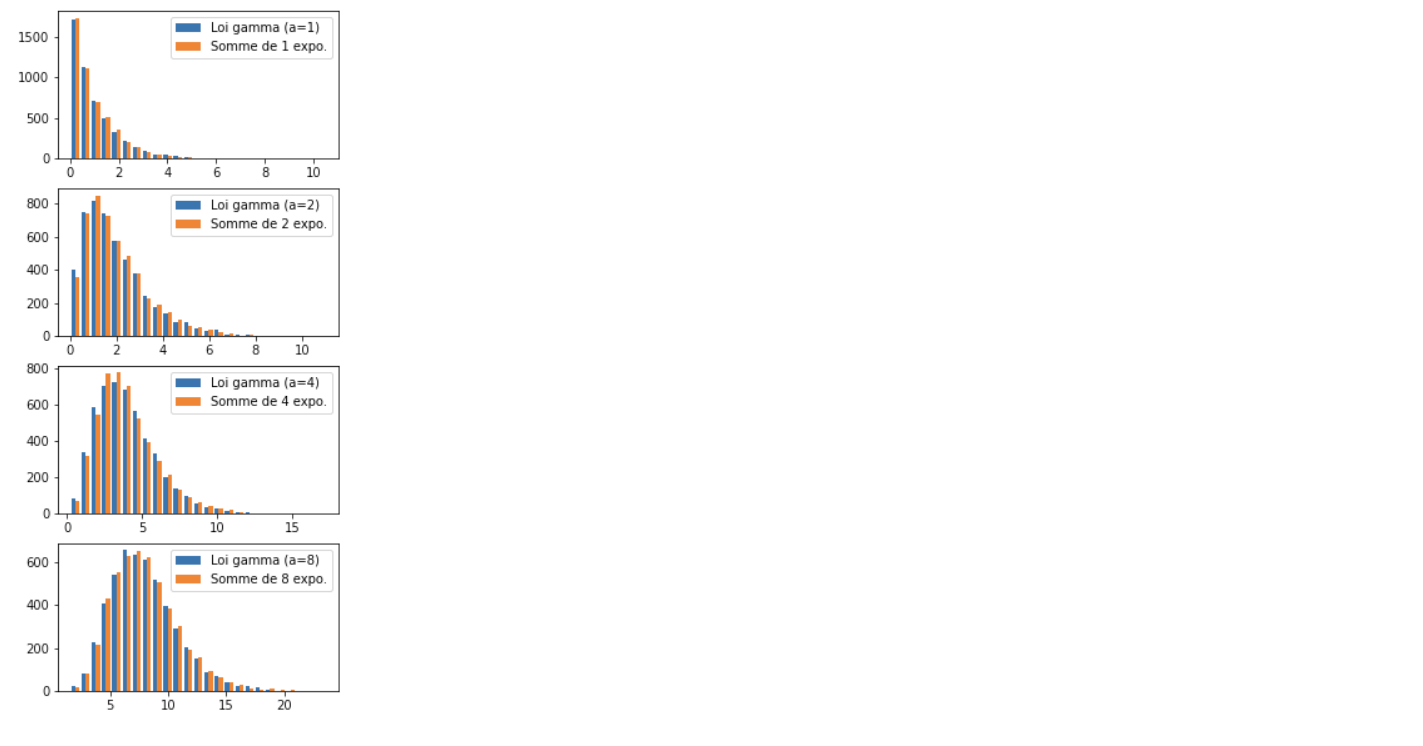

### La Loi Beta: 2 paramètres de forme

C'est une loi portée par $[0,1]$ dont voici la densité:
$$
\text{beta.pdf}(x, a, b) = \frac{\Gamma(a+b)}{\Gamma(a)\ \Gamma(b)}\ x^{a-1} (1-x)^{b-1}
$$



In [11]:
a=2
b=2
plt.hist(stats.beta.rvs(a=a,b=b,size=400),density=True,edgecolor="k")
x=np.linspace(0,1,100)
plt.plot(x,stats.beta.pdf(x,a=a,b=b));

#### → ♡

***A vous:*** faites varier $(2\heartsuit)$ $a$ et $b$ de manière à faire apparaitre tous les "types" possibles de loi bêta : cloche, smiley, décroissant, croissant.

In [12]:
a = [0.5, 2]
b = [0.5, 2]
x=np.linspace(0,1,100)

fig,ax = plt.subplots(2,2,figsize=(5,5),sharex=True)
for i in range(2):
    for j in range(2):
        ax[i,j].plot(x,stats.beta.pdf(x,a[i],b[j]),
                     label = "a="+str(a[i])+", b="+str(b[j]))
        ax[i,j].legend()

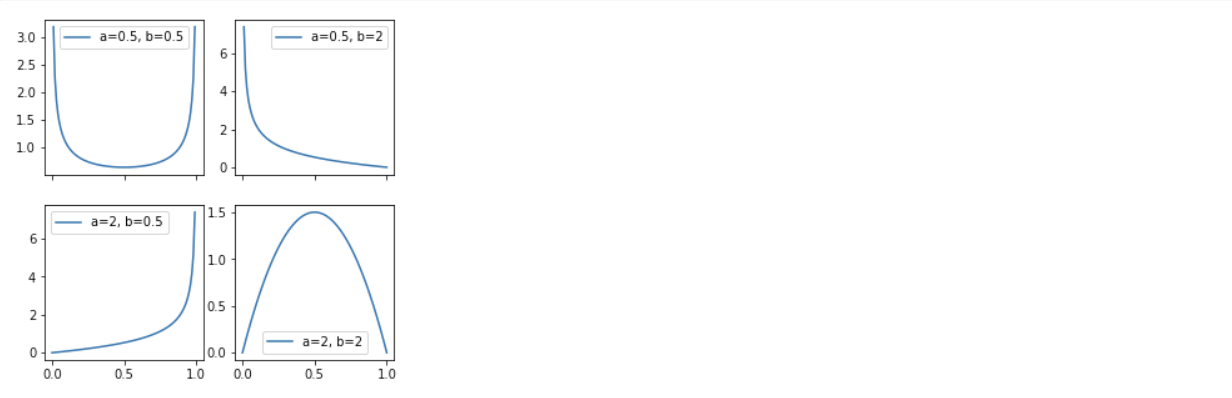

## Lois à queues lourdes

Une loi est dite à queue lourde lorsque les v.a qui ont cette loi peuvent prendre, de temps en temps, des grandes valeurs positives ou négatives. Elles servent à modéliser des évènements rares et violents (ex: crue d'un fleuve).

In [13]:

""" une fonction effectuant un histogramme tronqué """
def hist_trunc(ax,ech,gauche,droite,nb_batons,label=None):
    bins=np.linspace(gauche,droite,nb_batons)
    interval_width=(droite-gauche)/nb_batons
    weigh=np.ones_like(ech)/len(ech)/interval_width
    ax.hist(ech,bins=bins,weights=weigh,edgecolor="k",label=label)


### Loi t de Student $\triangleright$

C'est une loi très utile en statistique, portée par $\mathbb R,$ dont voici la densité:
$$
\text{t.pdf}(x, k) ={\frac  {1}{{\sqrt  {k\pi }}}}{\frac  {\Gamma ({\frac  {k+1}{2}})}{\Gamma ({\frac  {k}{2}})}}\left(1+{\frac  {x^{2}}{k}}\right)^{{-{\frac  {k+1}{2}}}}
$$
Le paramètre de forme $k$, appelé degré de liberté (noté `df` dans `scipy`) peut prendre toutes les valeurs dans $\mathbb R_+$. On y reviendra dans un prochain chapitre.

In [14]:
df=3 #degree of freedom
X=stats.t.rvs(df=df,size=1000)
x=np.linspace(-7,7,100)
fig,ax=plt.subplots()
hist_trunc(ax,X,-7,7,20)
ax.plot(x,stats.t.pdf(x,df=df));

#### → ♡♡

***A vous:*** Pour `df` petit (ex: 2), c'est une loi à queue lourde. Pour `df` grand, elle ressemble à la loi normale. Illustrez cela.  

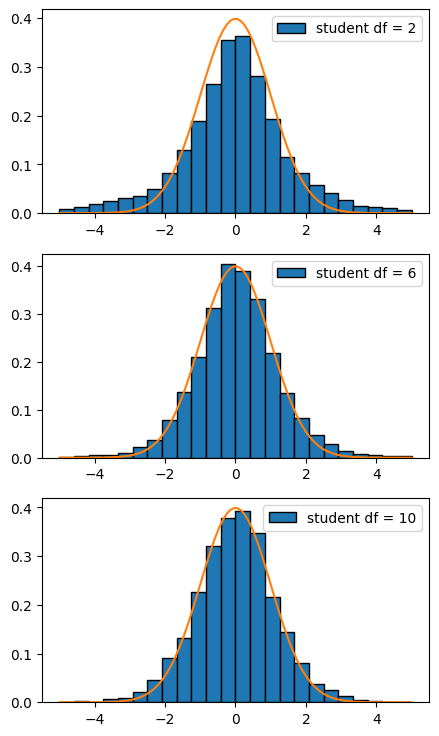

In [15]:
#--- To keep following outputs, do not run this cell! ---

### Loi de cauchy

C'est une loi portée par $\mathbb R$ dont la densité est:
$$
\text{cauchy.pdf}(x)=\frac 1 {\pi (1+x^2) }
$$



In [17]:
X=stats.cauchy.rvs(size=1000)

fig,ax=plt.subplots()
hist_trunc(ax,X,-7,7,20)

x=np.linspace(-7,7,100)
plt.plot(x,stats.cauchy.pdf(x));

***Proposition:*** Soit $X,Y$ deux gaussiennes indépendantes. Alors le rapport $\frac XY$ suit une loi de Cauchy.



Cette proposition illustre le fait que les v.a de Cauchy peuvent prendre des valeurs très grandes: car <font color="red"> □ □ □ </font>




*Démonstration à compléter:* Soit $\phi$ une fonction test et $X,Y$ deux gaussiennes indépendantes. On a
$$
        \mathbf E\left[\phi\left(\frac X Y\right)\right] = cst  \iint   \phi\left(\frac x y \right)  e^{- \frac 12 x^2} e^{-\frac 12 y^2}\, dx\,dy
$$
En posant $\frac x y = z$  et donc en faisant le changement de variable $x \to yz$  (ou bien $y\to \frac x z$) on obtient... Ensuite, on  calcule explicitement l'une des deux intégrales, et on tombe sur la densité de la Cauchy.



***Démonstration:***  Soit $\phi$ une fonction test et $X,Y$ deux gaussiennes indépendantes. On a
$$
\mathbb E\left[\phi\left(\frac X Y\right)\right] = {1\over 2\pi}  \iint \phi\left(\frac x y \right)  e^{- \frac 12 x^2} e^{-\frac 12 y^2}\,dx\,dy
$$
En posant $\frac x y = z$  et donc en faisant le changement de variable $x \to yz$  (ou bien $y\to \frac x z$) on obtient :

### ♡♡♡

#### →♡♡♡

Pour vérifier cette proposition empiriquement, comparons la densité de la cauchy et de quotients de simulations de gaussiennes :

In [ ]:
#--- To keep following outputs, do not run this cell! ---

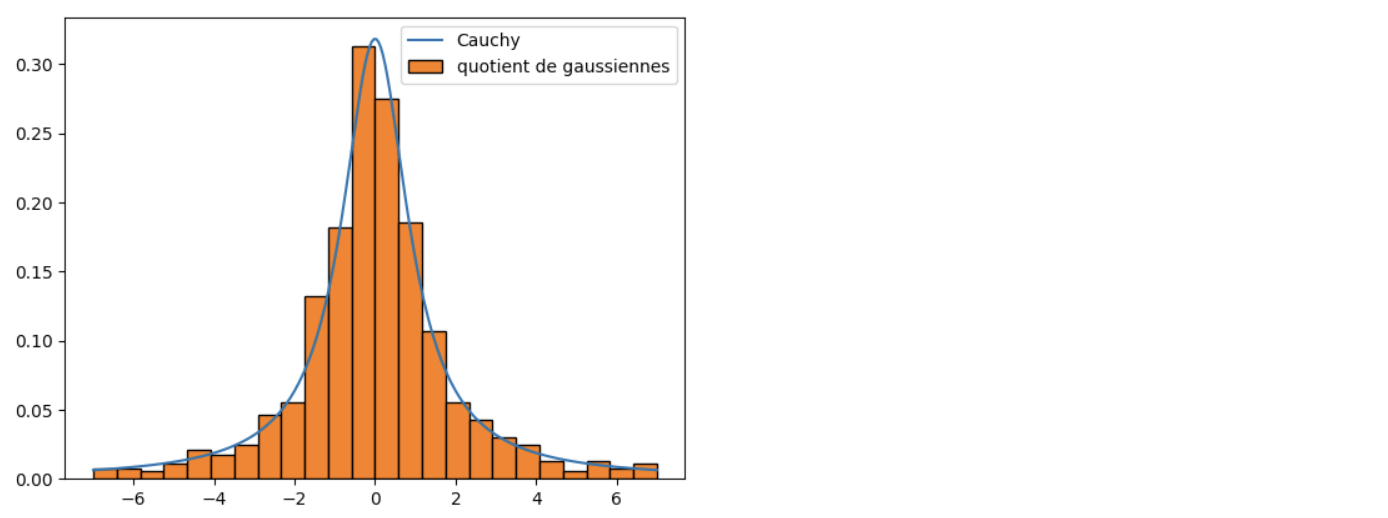

## Résumé de la syntaxe



### Utilisez l'aide incluse

L'ensemble de toutes les lois disponibles dans `scipy.stats` est visible [ici](https://docs.scipy.org/doc/scipy/reference/stats.html).  Pour savoir comment utiliser ces lois, utilisez le point d'interrogation:

        stats.beta?
        
        
Vous verrez que cet objet informatique `stats.beta` possède

* une méthode pour simuler des v.a:
        rvs(a, b, loc=0, scale=1, size=1, random_state=None)
   
 où `a` et `b` sont les paramètres de forme, et `size` le nombre de v.a que l'on souhaite (cela peut être un scalaire ou bien un tuple).

* Une méthode pour avoir la densité (`x` c'est l'endroit où l'on calcule cette densité):
        pdf(x, a, b, loc=0, scale=1)
    
* Une méthode pour calculer les moments (`n` c'est le moment que l'on veut):
        moment(n, a, b, loc=0, scale=1)

 etc.




Dans les trois sections qui suivent, nous listons les lois les plus communes en indiquant leurs paramètres (on a omis les paramètres `loc` et `scale`). Le module `numpy` permet aussi de simuler ces lois, mais la syntaxe est légèrement différente: on l'indique aussi.

### Des lois continues

* stats.**beta**.pdf(x, a, b) =
$$
{\frac {1}{\mathrm {B} (a ,b )}}x^{a -1}(1-x)^{b -1} \ ,\quad x\in[0,1],\ a>0,\ b>0
$$
Existe en numpy:
```
stats.beta.rvs(a,b) = np.random.beta(a,b)
```

* stats.**cauchy**.pdf(x) =
$$
 \frac 1{\pi(1+x^2)}
$$
Existe en numpy:
```
stats.cauchy.rvs() = np.random.cauchy()
```

* stats.**chi2**.pdf(x, df=k) =
$$
 {\frac {1}{2^{k/2}\Gamma (k/2)}}\;x^{k/2-1}e^{-x/2}  \ ,\quad x>0
$$

* stats.**weibull_min**.pdf(x, c) =
$$
c x^{c-1} e^{x^c}   \ ,\quad x>0,\ c>0
$$
Existe en numpy:
```
stats.weibull_min.rvs(c) = np.random.weilbull(a)
```

* stats.**expon**.pdf(x) =
$$
e^{-x} 1_{\{x>0\}}  
$$
Existe en numpy:
```
stats.expon.rvs() = np.random.exponential()
```

* stats.**gamma**.pdf(x, a) =
$$
 \frac {1}{\Gamma (a)} x^{a-1}e^{-x} \ ,\quad x>0
$$
Existe en numpy:
```
stats.gamma.rvs(a) = np.random.gamma(shape)
```

* stats.**norm**.pdf(x) =
$$
\frac 1 {\sqrt{2\pi}} e^{-\frac 12 x^2}
$$
Existe en numpy:
```
stats.norm.rvs() = np.random.normal()
```

* stats.**t**.pdf(x, df=$\nu$) =
$$
\textstyle\frac{\Gamma \left(\frac{\nu+1}{2} \right)} {\sqrt{\nu\pi}\,\Gamma \left(\frac{\nu}{2} \right)} \left(1+\frac{x^2}{\nu} \right)^{-\frac{\nu+1}{2}}\!
$$

* stats.**uniform**.pdf(x) =
$$
{1_{0 \leqslant x \leqslant 1}}
$$
Pour obtenir une loi uniforme sur $[a,b]$, il faut prendre `loc`$=a$ et `scale`$=b-a$.
Existe en numpy, et là on précise simplement les bornes de l'intervalle:
```
np.random.uniform(a, b)
```


### Des lois discrètes


* stats.**binom**.pmf(k, n, p) =
$$
 {n \choose k}\,p^{k}(1-p)^{n-k}
$$
```
stats.binom.rvs(n,p) = np.random.binomial(n,p)
```

* stats.**geom**.pmf(k, p) =
$$
 (1-p)^{k-1}p  \ ,\quad   k\geq1
$$
```
stats.geom.rvs(p) = np.random.geometric(p)
```

* stats.**hypergeom**.pmf(k, M, n, N) =
$$
{{{n \choose k}{{M-n} \choose {N-k}}} \over {M \choose N}}
$$
```
stats.hypergeom.rvs(M, n, N) =
np.random.hypergeometric(ngood, nbad, nsample)
```

* stats.**poisson**.pmf(k, $\mu$) =
$$
e^{-\mu }  {\frac {\mu ^{k}}{k!}}
$$
```
stats.poisson.rvs(mu=.) =
        np.random.poisson(lam=.)
```

* stats.**randint**.pmf(k, a, b) =
$$
\frac{1}{b-a}\, 1_{a \leqslant k < b}
$$
```
stats.randint.rvs(low, high) =
        np.random.randint(low, high)
```
Attention: comme d'habitude en python, l'intervalle est fermé à gauche mais ouvert à droite.

Voici une loi uniquement dans numpy, mais dont la densité est triviale:
* loi pour choisir des élements, par exemple $[2,4,6]$ selon des probas données, par exemple $[0.2,0.2,0.6]$
        np.random.choice(a=[2,4,6], p=[0.2,0.2,0.6])


### Des lois multi-variées

* stats.**multivariate_normal**.pdf(x, mean=$\mu$, cov=$\Sigma$) =
$$
 \operatorname {det} (2\pi {\boldsymbol {\Sigma }})^{-{\frac {1}{2}}}\,e^{-{\frac {1}{2}}(\mathbf {x} -{\boldsymbol {\mu }})^\top{\boldsymbol {\Sigma }}^{-1}(\mathbf {x} -{\boldsymbol {\mu }})}
$$
Par défaut, cela renvoie un message d'erreur si la matrice `cov` est singulière. Pour éviter l'erreur il faut préciser `allow_singular=True`.


* stats.**multinomial**.pdf(x=$[x_1,...,x_k]$, n, p=$[p_1,...,p_k]$) =
$$
\frac{n!}{x_1!\cdots x_k!} p_1^{x_1} \cdots p_k^{x_k} \ ,\quad  x_1+\cdots+x_k=n
$$


#### Traçons une gaussienne

In [48]:
n=5
a=np.linspace(-2,2,n)
XX,YY=np.meshgrid(a,a)

XX,YY

In [49]:
XX=XX.flatten()
XX

In [50]:
YY=YY.flatten()
XY=np.stack([XX,YY],axis=1)
XY

In [51]:
Z=stats.multivariate_normal.pdf(XY,mean=[0,0],cov=[[1,0.5],[0.5,1]])
Z

In [52]:
Z=Z.reshape([n,n])
Z

In [54]:
fig,ax=plt.subplots()
ax.imshow(Z,origin="lower");

### Relations entre les lois


Il est important de retenir les relations entre les principales lois, l'image ci-dessous peut vous aider à cela. Sinon,  cette [page](http://www.math.wm.edu/~leemis/chart/UDR/UDR.html) contient encore plus de relations, ainsi que leur justification mathématique.



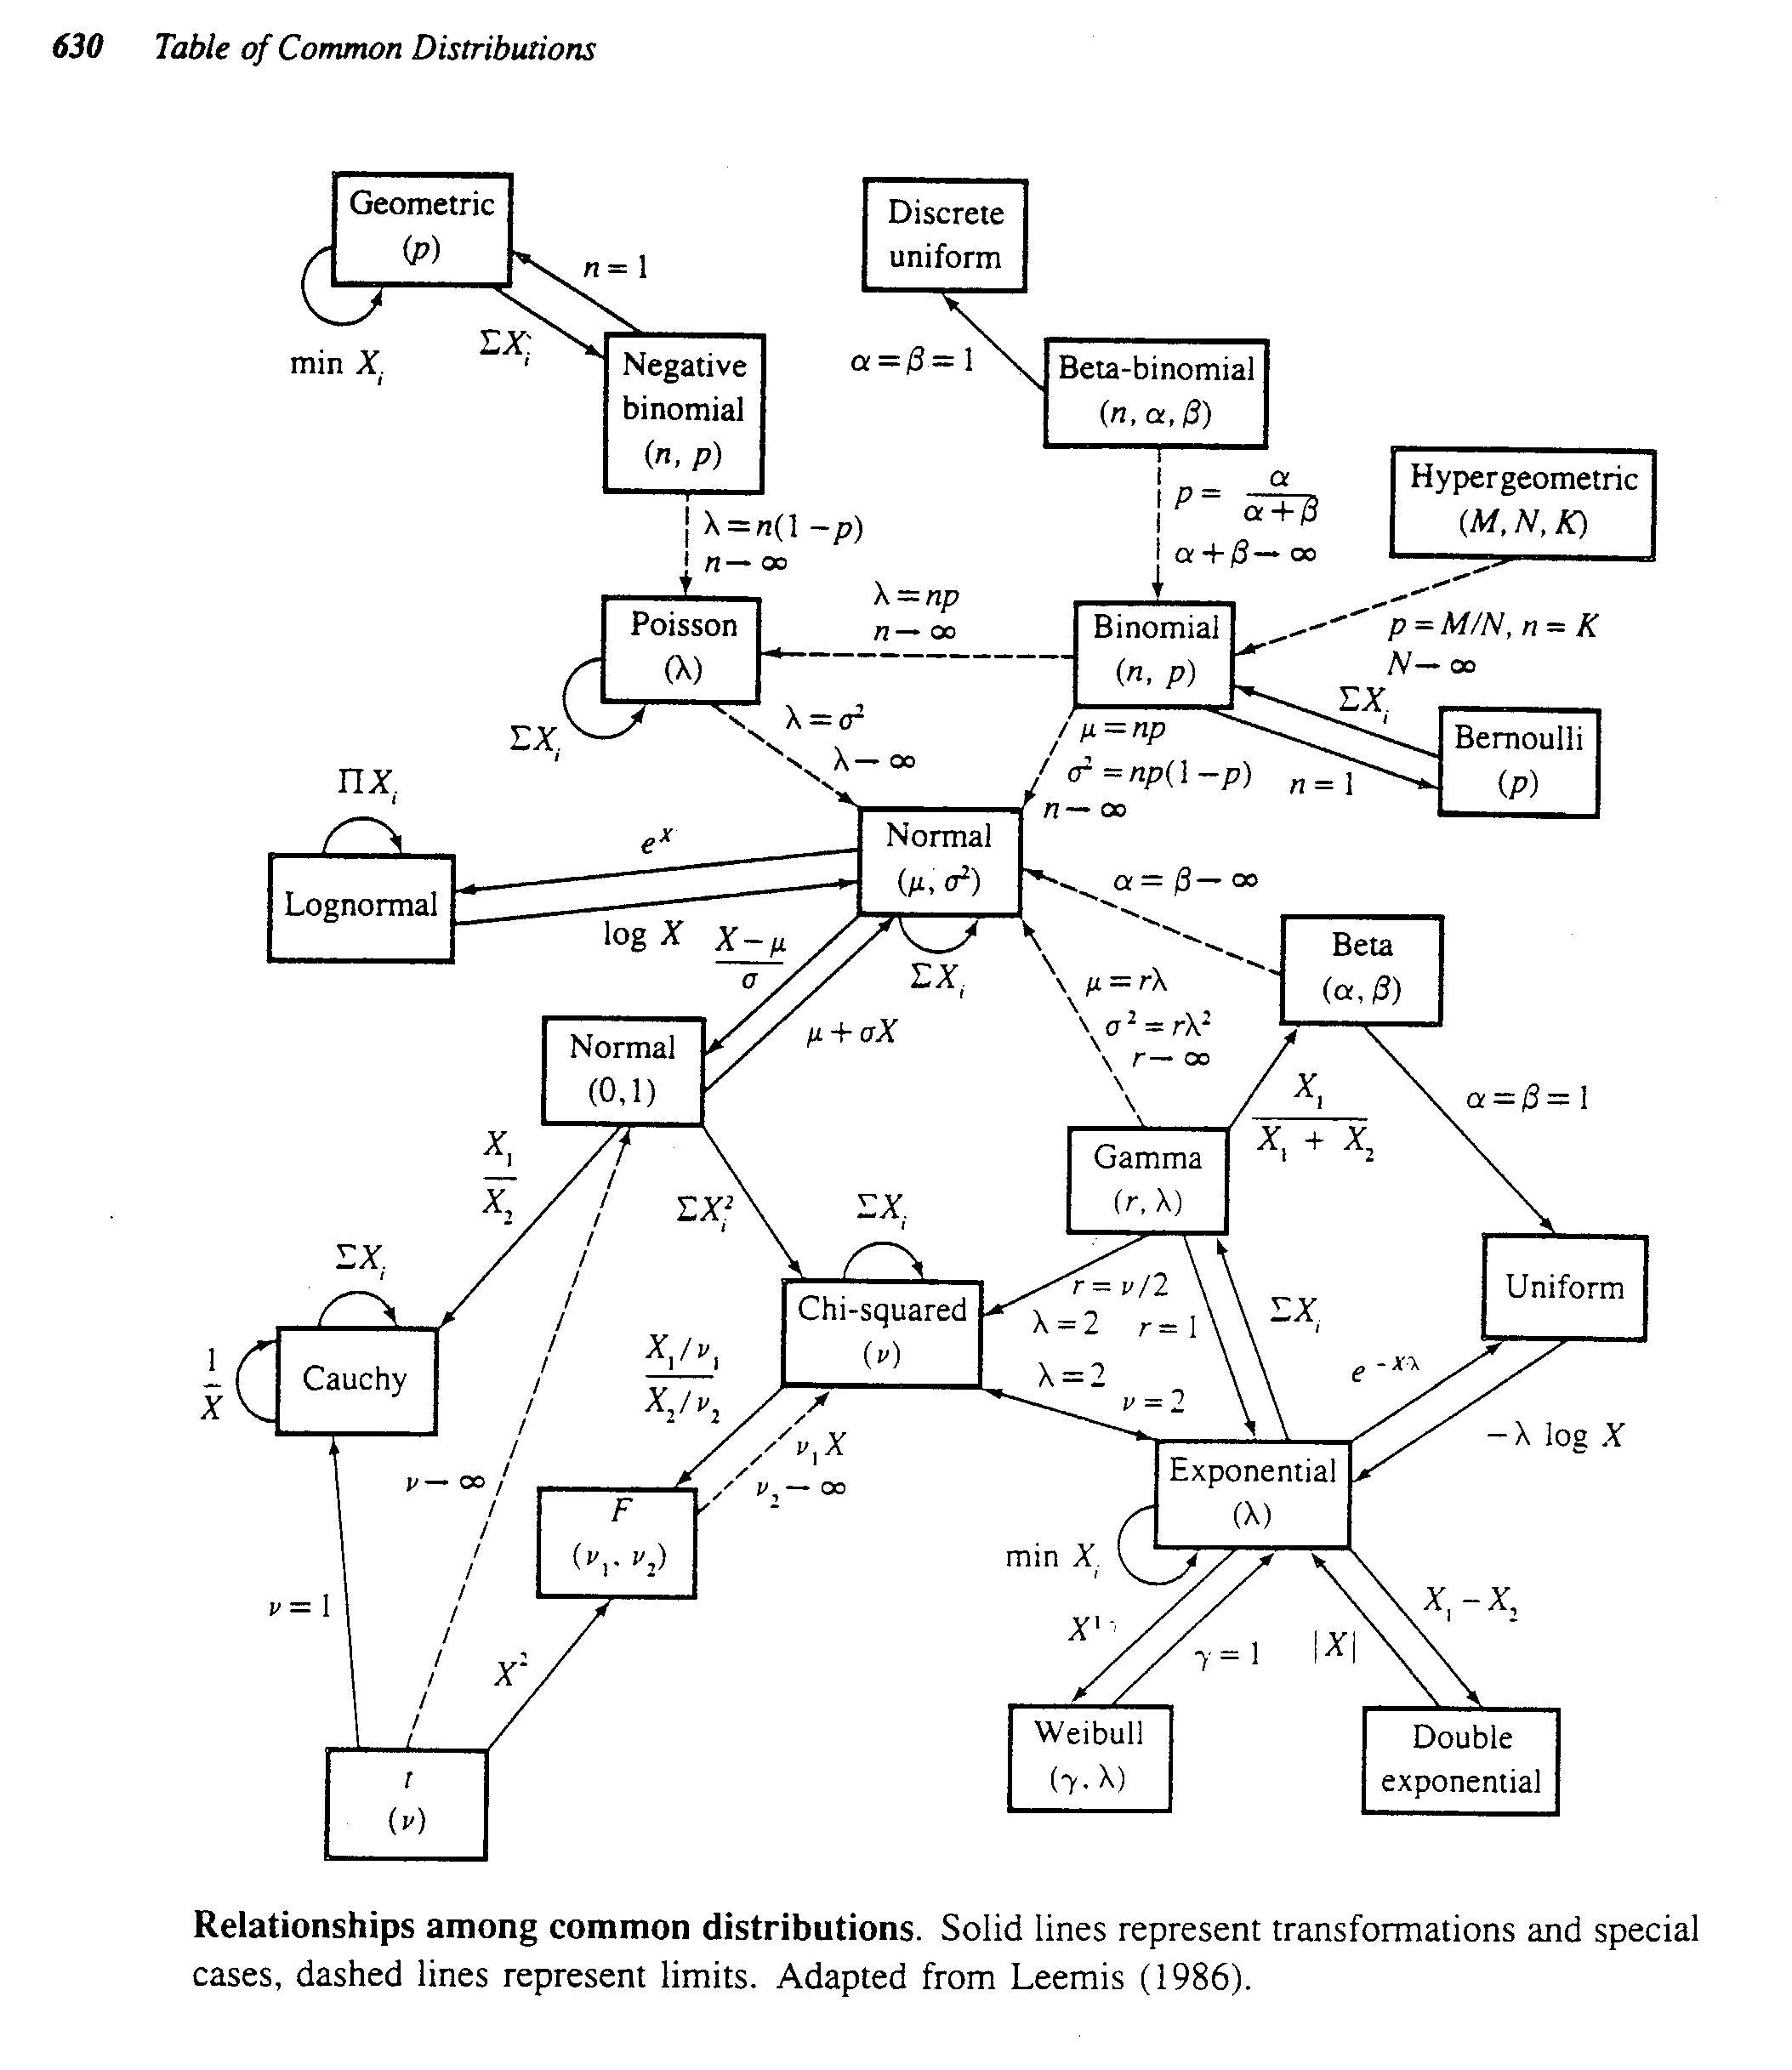

***Exo:*** Illustrez les égalités en loi qui vous semblent intéressantes dans le schéma ci-dessus. Accordez-vous des $\heartsuit$ en fonction du temps passé.

#### →♡♡

Illustrons le théorème suivant:


Soient $X_1$ et $X_2$  des v.a indépendantes avec
* $X_1$ suivant une loi gamma de paramètre $\alpha$
* $X_2$ suivant une loi gamma de paramètre $\beta$

Alors $\frac{X_1}{X1+X2}$ suit une loi bêta de paramètre $(\alpha,\beta)$.



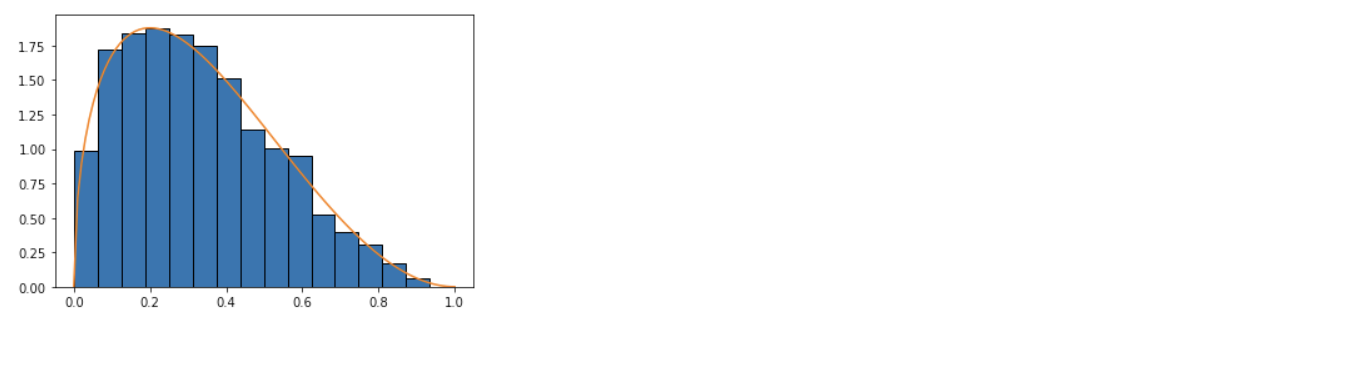